# Intro

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import linear_model
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf

Talk about why we only used portugese data

In [2]:
data = pd.read_csv("student-por.csv")

# Data Tidying
## Drop irrelevant columns
## rename vague columns

Link or key to table

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# data = data.drop(["address",'reason','health'])

In [5]:
data = data.rename({"goout": 'social_activity', 'Pstatus' : 'parental_status', 'Dalc' : 'Weekday_alc', 'Walc' : 'Weekend_alc'})

In [6]:
data['schoolsup'] = data['schoolsup'].replace('yes', 1).replace('no', 0)
data['famsup'] = data['famsup'].replace('yes', 1).replace('no', 0)
data['paid'] = data['paid'].replace('yes', 1).replace('no', 0)
data['activities'] = data['activities'].replace('yes', 1).replace('no', 0)
data['nursery'] = data['nursery'].replace('yes', 1).replace('no', 0)
data['higher'] = data['higher'].replace('yes', 1).replace('no', 0)
data['internet'] = data['internet'].replace('yes', 1).replace('no', 0)
data['romantic'] = data['romantic'].replace('yes', 1).replace('no', 0)

# EDA

## Profile socioeconomic status Natan
* M/Fedu
* M/Fjob
* internet access
* nursery
* paid

## Alcohol use Ben
* by age
* by gender
* by ses
* by sp
* by grades

## Grades Ben
* by gender
* by ses
* by sp

## Social participation Shevi
* romantic
* activities
* goout

In [9]:
fig, ax = plt.subplot(1,2)
sns.countplot(x='romantic', data=data)
sns.countplot(x='activities', data=data)
#sns.countplot(x='social_activity', data=data)

ValueError: Illegal argument(s) to subplot: (1, 2)

<Figure size 432x288 with 0 Axes>

In [10]:
# # Alcohol use Ben
# * by age
# * by gender
# * by ses
# * by sp
# * by grades


# ## Grades Ben
# * by gender
# * by ses
# * by sp

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


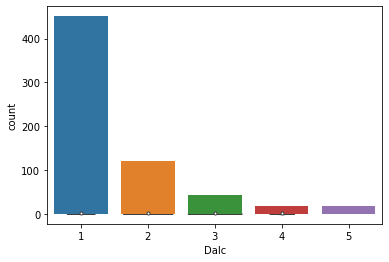

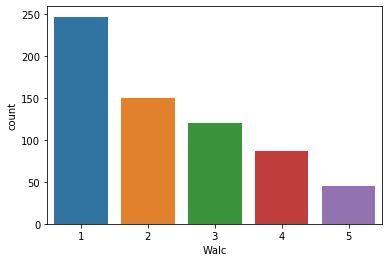

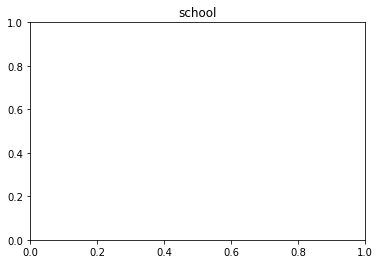

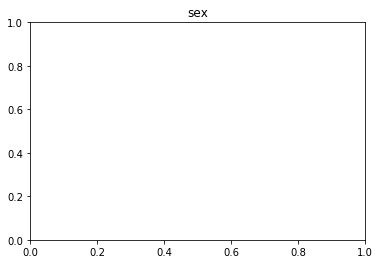

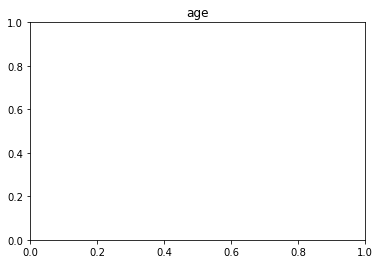

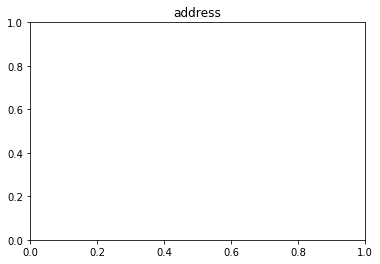

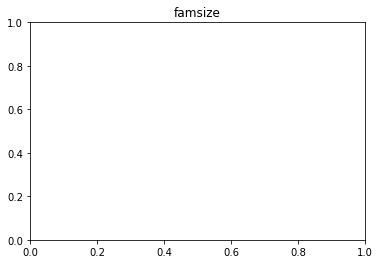

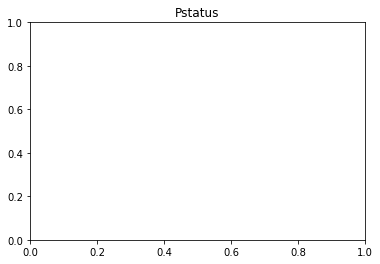

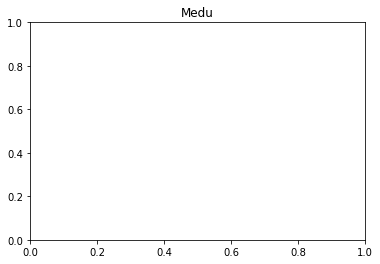

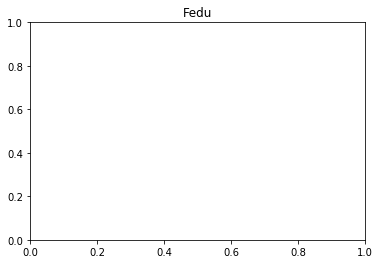

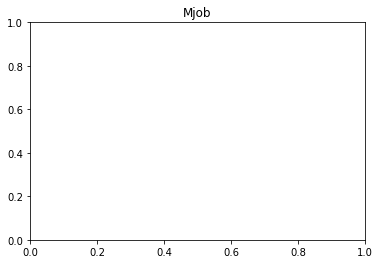

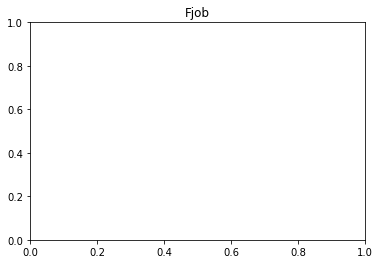

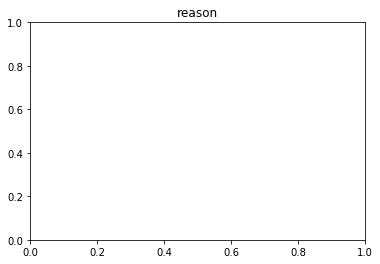

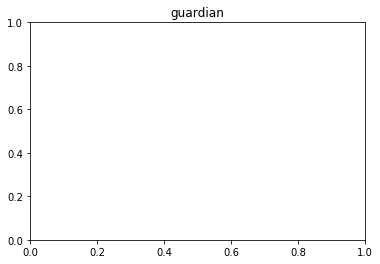

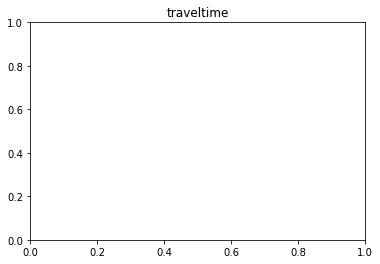

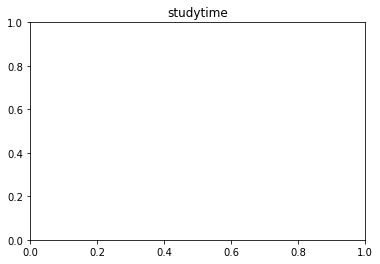

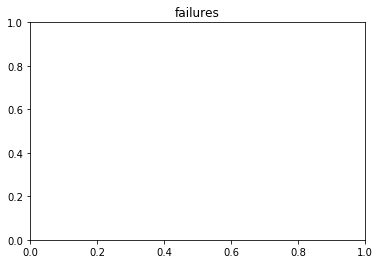

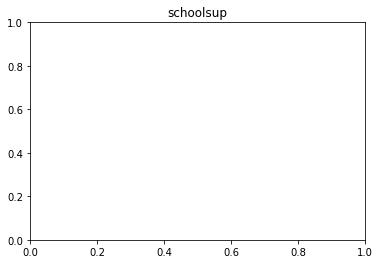

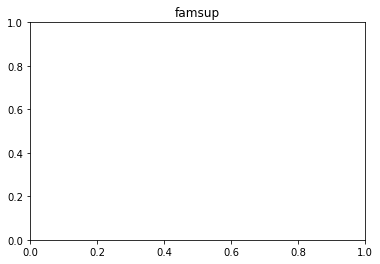

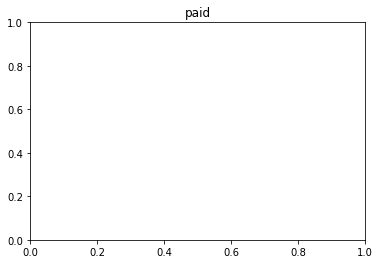

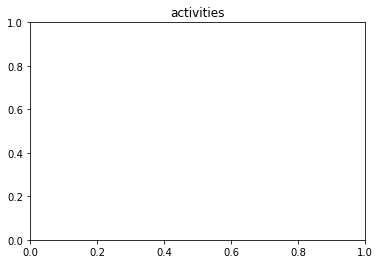

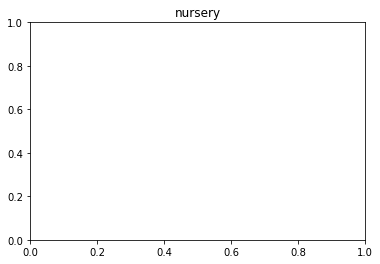

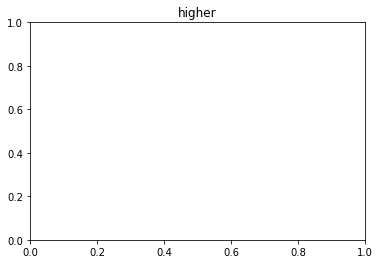

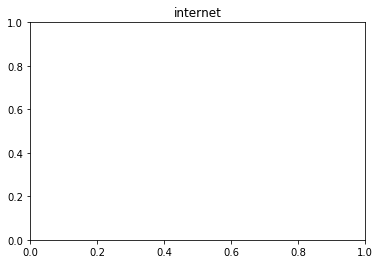

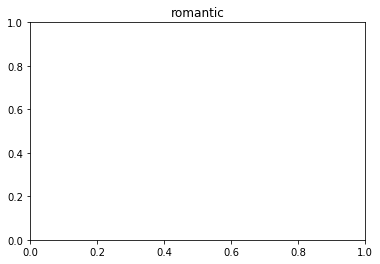

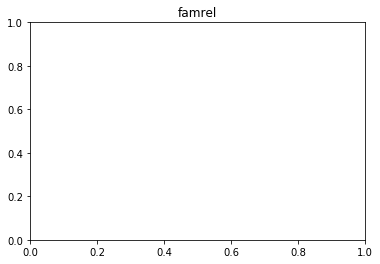

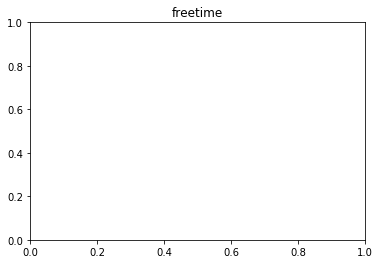

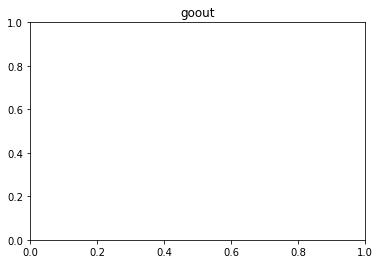

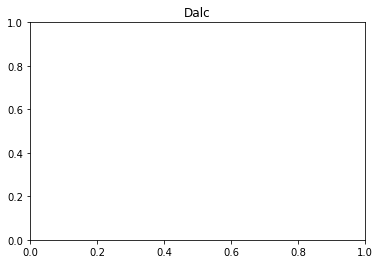

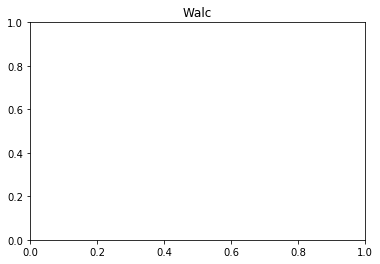

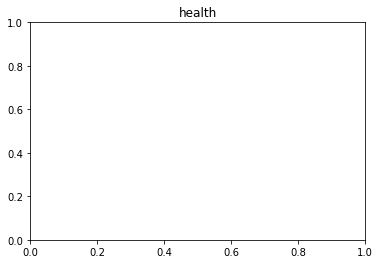

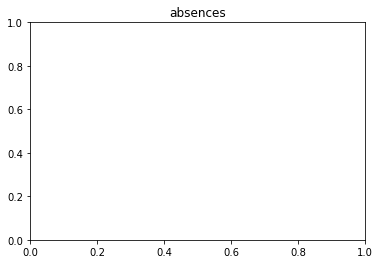

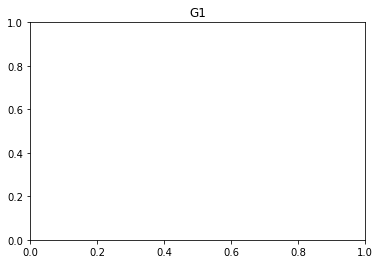

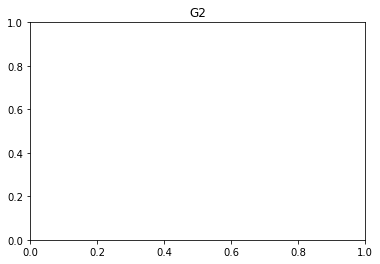

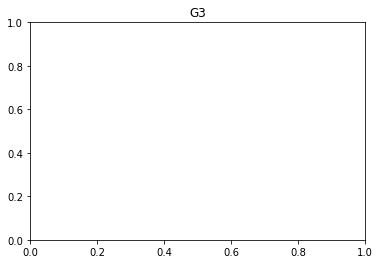

In [32]:
print(data.columns)
fig, ax = plt.subplots()
x = data.studytime
y = data.Dalc
sns.violinplot(x=x, y = y)
sns.countplot(x='Dalc', data=data)
fig, ax = plt.subplots()
sns.countplot(x='Walc', data=data)
for col in data.columns:
    fig, ax = plt.subplots()
    
    x = col
    y = y
#     b, m = polyfit(x, y, 1)
#     plt.plot(x, y, '.')
#     plt.plot(x, b + m * x, '-')
#     plt.show()
    plt.title(col)
    #sns.violinplot(x=data[x], y=y)
    

In [ ]:
high correlations walc: failures, studytime, sex, age, school support, freetime, social activity, DALC COOL, grades but only fail
 age affects alc based off weekend   

# Machine Learning
## social participation, ses  predicts alcohol
## alcohol, sp, ses predicts grades
## 